In [1]:
import pandas as pd

url = 'https://raw.githubusercontent.com/Adelaaas/Data_science_basic_22-23_1/main/home_work_7-8_clustering/Credit%20Card%20Dataset.csv'
df = pd.read_csv(url)

df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

ЗАДАНИЕ 1

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

<Figure size 720x432 with 0 Axes>

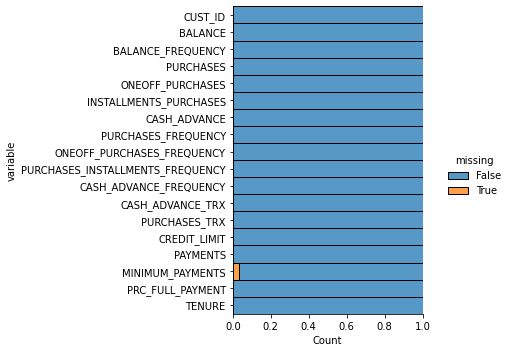

In [5]:
plt.figure(figsize=(10,6))
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

Пропуски в колонке MINIMUM_PAYMENTS встречаются довольно часто, поэтому в данном случае для лучшего анализа стоит удалить эту колонку.

Пропуск в колонке CREDIT_LIMIT встречается всего единожды, поэтому в данном случае для лучшего анализа стоит удалить данные о клиенте с пропуском в этой колонке.


In [6]:
df = df.drop(columns = ['MINIMUM_PAYMENTS'])
df = df.dropna(axis=0, how='any')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8949 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8949 non-null   object 
 1   BALANCE                           8949 non-null   float64
 2   BALANCE_FREQUENCY                 8949 non-null   float64
 3   PURCHASES                         8949 non-null   float64
 4   ONEOFF_PURCHASES                  8949 non-null   float64
 5   INSTALLMENTS_PURCHASES            8949 non-null   float64
 6   CASH_ADVANCE                      8949 non-null   float64
 7   PURCHASES_FREQUENCY               8949 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8949 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8949 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8949 non-null   float64
 11  CASH_ADVANCE_TRX                  8949 non-null   int64  
 12  PURCHA

In [7]:
df.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

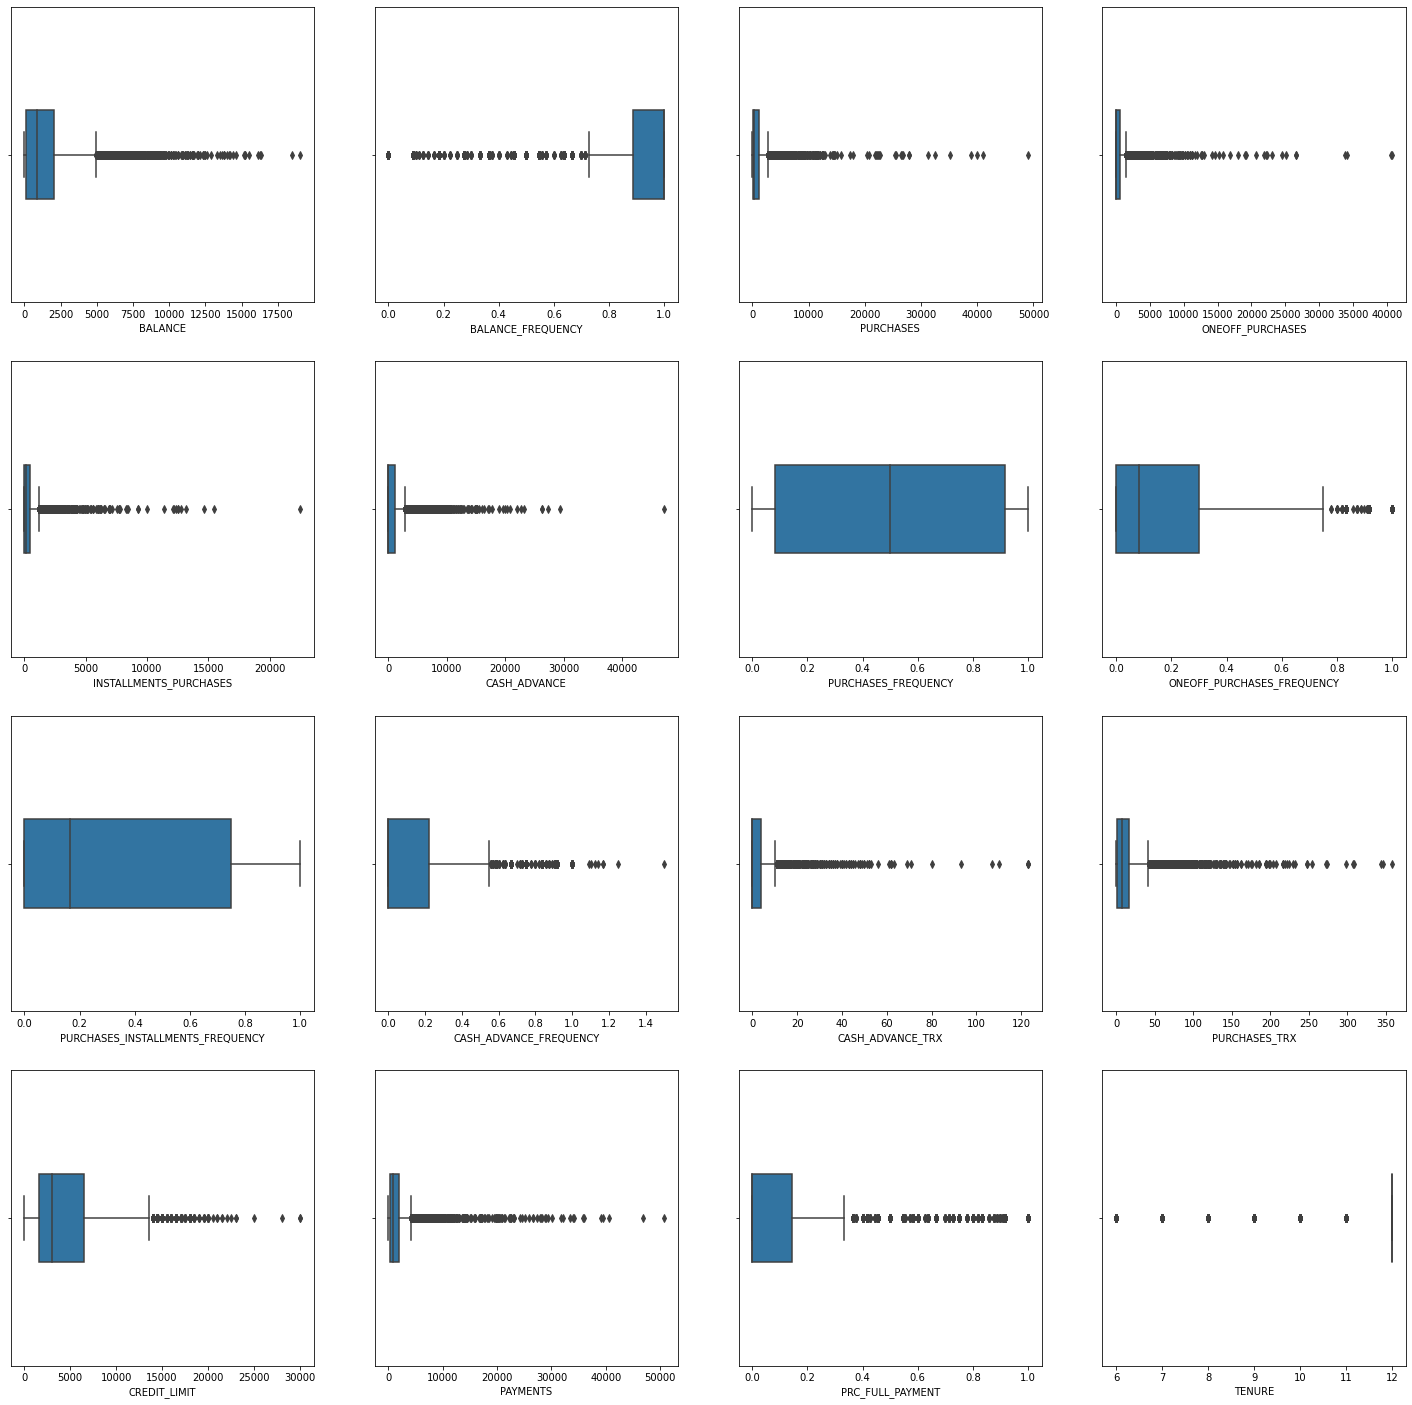

In [8]:
fig, axes = plt.subplots(4, 4, figsize=(25,25))  

sns.boxplot(df['BALANCE'], ax=axes[0, 0], width=0.3)
sns.boxplot(df['BALANCE_FREQUENCY'], ax=axes[0, 1], width=0.3)
sns.boxplot(df['PURCHASES'], ax=axes[0, 2], width=0.3)
sns.boxplot(df['ONEOFF_PURCHASES'], ax=axes[0, 3], width=0.3)
sns.boxplot(df['INSTALLMENTS_PURCHASES'], ax=axes[1, 0], width=0.3)
sns.boxplot(df['CASH_ADVANCE'], ax=axes[1, 1], width=0.3)
sns.boxplot(df['PURCHASES_FREQUENCY'], ax=axes[1, 2], width=0.3)
sns.boxplot(df['ONEOFF_PURCHASES_FREQUENCY'], ax=axes[1, 3], width=0.3)
sns.boxplot(df['PURCHASES_INSTALLMENTS_FREQUENCY'], ax=axes[2, 0], width=0.3)
sns.boxplot(df['CASH_ADVANCE_FREQUENCY'], ax=axes[2, 1], width=0.3)
sns.boxplot(df['CASH_ADVANCE_TRX'], ax=axes[2, 2], width=0.3)
sns.boxplot(df['PURCHASES_TRX'], ax=axes[2, 3], width=0.3)
sns.boxplot(df['CREDIT_LIMIT'], ax=axes[3, 0], width=0.3)
sns.boxplot(df['PAYMENTS'], ax=axes[3, 1], width=0.3)
sns.boxplot(df['PRC_FULL_PAYMENT'], ax=axes[3, 2], width=0.3)
sns.boxplot(df['TENURE'], ax=axes[3, 3], width=0.3)

По графикам видно, что в данных присутствует много выбросов. Из этого можно сделать вывод, что данные разбросаны хаотично.

In [9]:
df.duplicated().sum()

0

В Dataset отсутствуют дупликаты

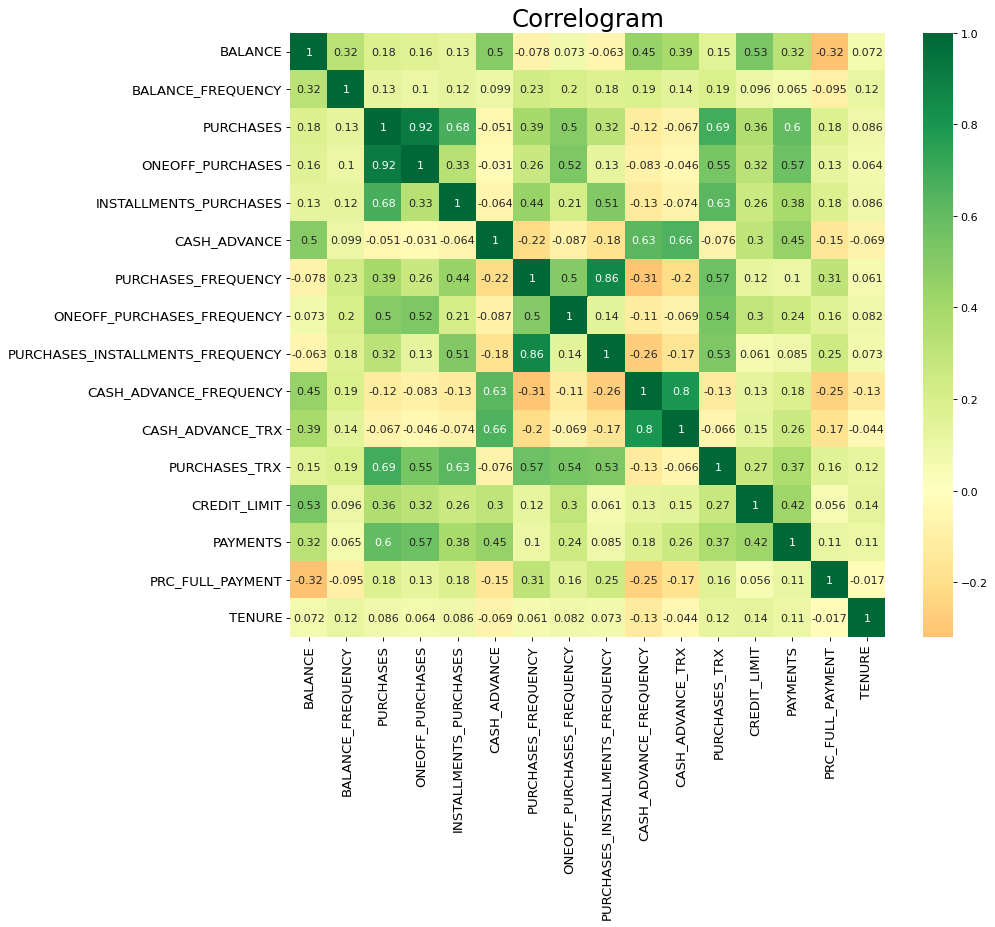

In [10]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.title('Correlogram', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

#Построим коррелограмму и на её основе определим, какие признаки коррелируются больше всего

В Dataset присутствуют признаки, коррелирующие довольно сильно (максимальная корреляция - 0,92)

ЗАДАНИЕ 2

In [11]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib

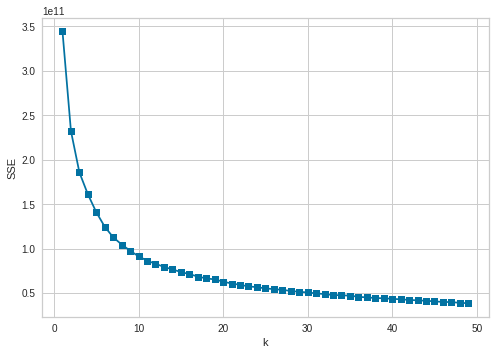

In [18]:
#МЕТОД ЛОКТЯ

df = df.drop("CUST_ID", axis = 1)
SSE = []

for k in range(1,50):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(df)
    SSE.append(kmeans.inertia_)
 
plt.plot(range(1,50), SSE, marker='s');
plt.xlabel('k')
plt.ylabel('SSE');
plt.show()

Возьмём количество кластеров, равное 12

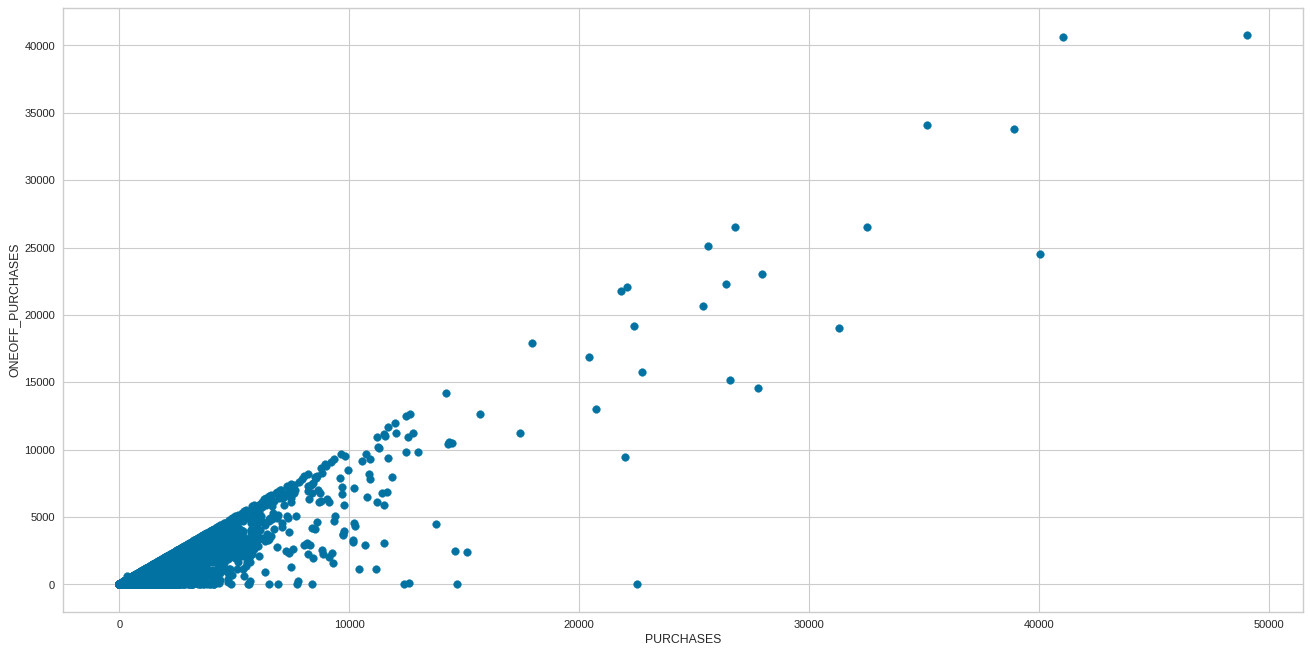

In [52]:
plt.figure(figsize=(20, 10), dpi = 80)
plt.scatter(df['PURCHASES'], df['ONEOFF_PURCHASES'])
plt.xlabel('PURCHASES')
plt.ylabel('ONEOFF_PURCHASES')
plt.show()

In [41]:
kmeans = KMeans(n_clusters=12)
kmeans.fit(df)
df["CLUSTER"] = kmeans.predict(df)

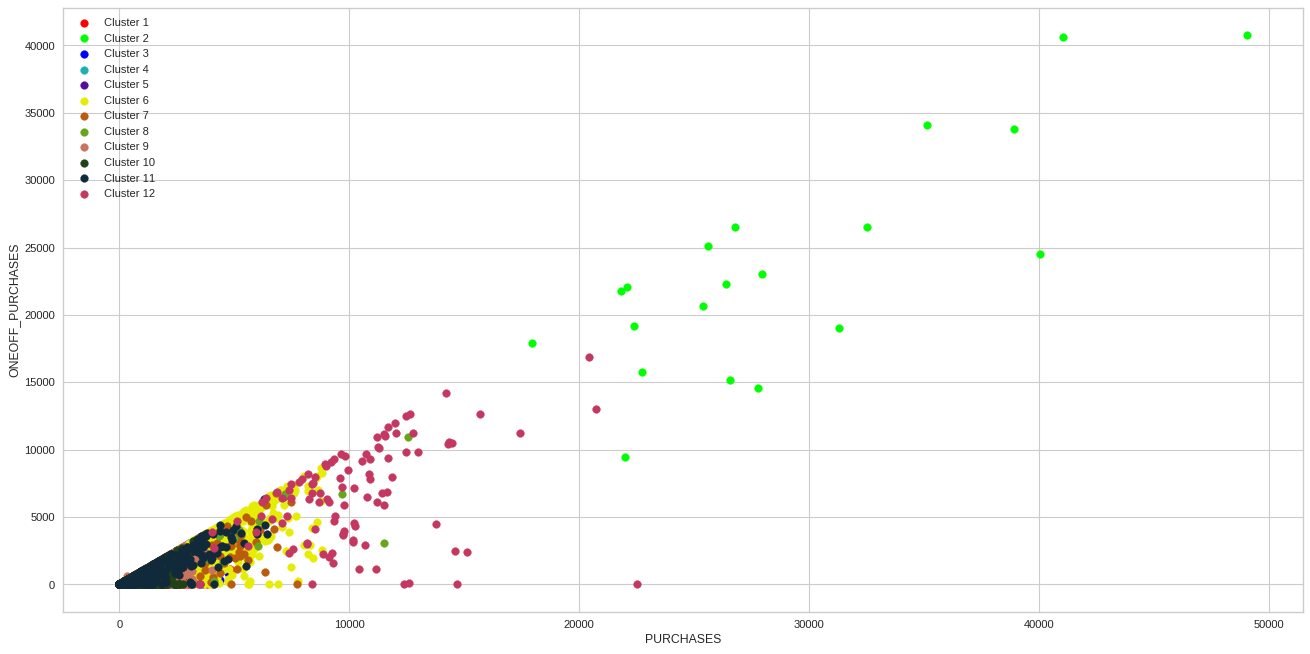

In [42]:
colors = ["#FF0000", "#00FF00", "#0000FF", "#1BB0B3", "#550E9C", "#E5ED07", "#BA5B0D", "#67A61B", "#C9725D", "#1F4217", "#112A3B", "#C43761"]
plt.figure(figsize=(20,10), dpi= 80)
for i in range(12):
  plt.scatter(df[df["CLUSTER"]==i]["PURCHASES"], df[df["CLUSTER"]==i]["ONEOFF_PURCHASES"], color=colors[i], label=f'Cluster {i+1}')
  plt.legend()
plt.xlabel("PURCHASES")
plt.ylabel("ONEOFF_PURCHASES")
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fb866abdeb0>,
                     estimator=KMeans(n_clusters=12))

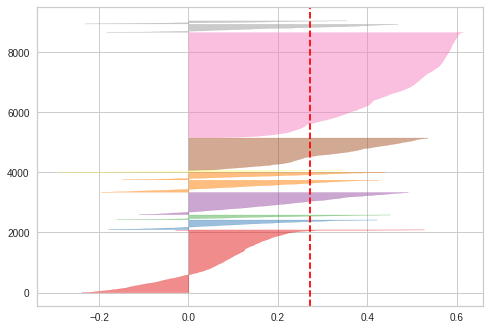

In [43]:
silhouette = SilhouetteVisualizer(kmeans)
silhouette.fit(df)

ЗАДАНИЕ 3

In [47]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import fcluster

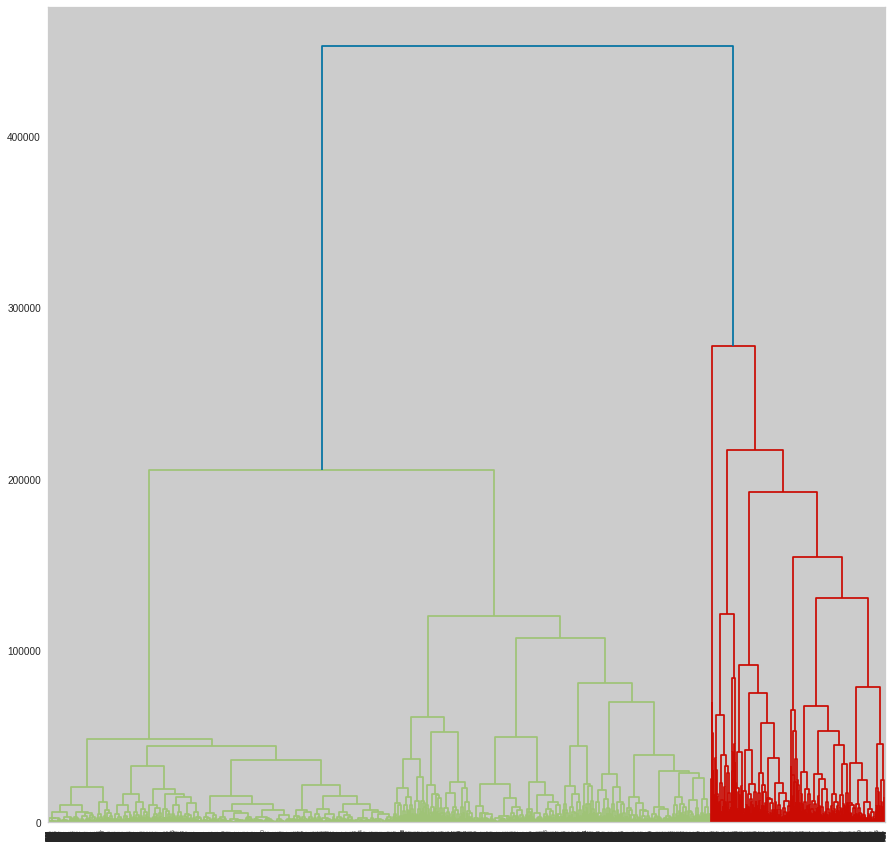

In [46]:
Z = linkage(df, 'ward')
fig = plt.figure(figsize=(15, 15))
dn = dendrogram(Z)

In [48]:
label = fcluster(Z, 100000, criterion = "distance")
df["CLUSTER"] = label
np.unique(label)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int32)

Если выбрать оптимальным расстояние в 100000, то количество кластеров равно 11

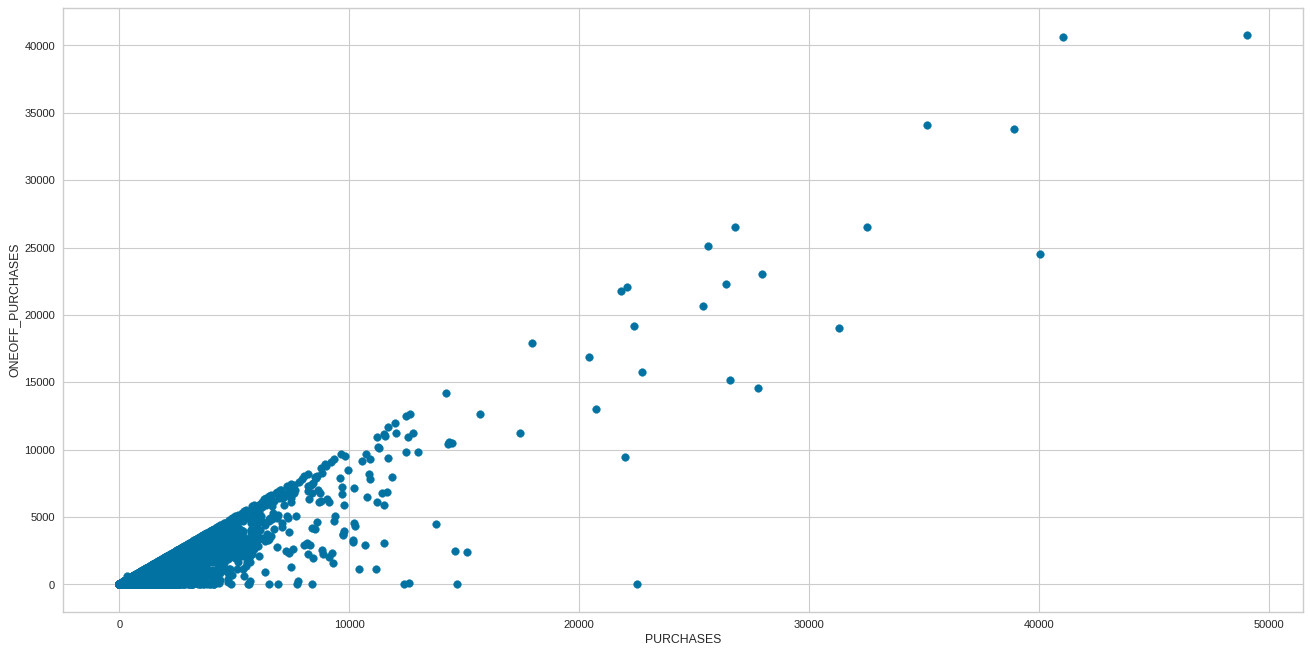

In [53]:
plt.figure(figsize=(20, 10), dpi = 80)
plt.scatter(df['PURCHASES'], df['ONEOFF_PURCHASES'])
plt.xlabel('PURCHASES')
plt.ylabel('ONEOFF_PURCHASES')
plt.show()

График объектов до кластеризации

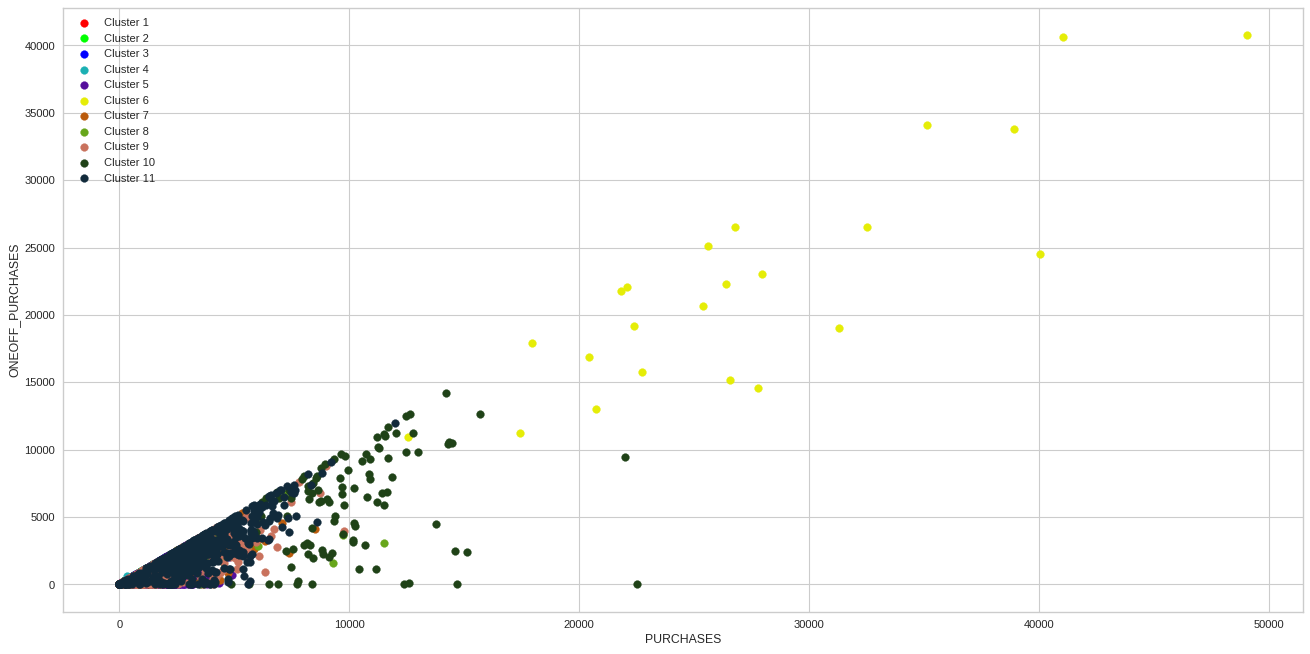

In [54]:
colors = ["#FF0000", "#00FF00", "#0000FF", "#1BB0B3", "#550E9C", "#E5ED07", "#BA5B0D", "#67A61B", "#C9725D", "#1F4217", "#112A3B", "#C43761"]
plt.figure(figsize=(20,10), dpi= 80)
for i in range(11):
  plt.scatter(df[df["CLUSTER"]==i]["PURCHASES"], df[df["CLUSTER"]==i]["ONEOFF_PURCHASES"], color=colors[i], label=f'Cluster {i+1}')
  plt.legend()
plt.xlabel("PURCHASES")
plt.ylabel("ONEOFF_PURCHASES")
plt.show()

График объектов после кластеризации

/Офигеть, я сделал это дз спустя столько времени, я в шоке/